<a href="https://colab.research.google.com/github/sajjad73hajizade/shirazU-learn/blob/main/microwave_timeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from osgeo import gdal
import numpy as np

In [3]:
# بارگیری تصاویر اینترفروگرام
interferogram_1 = gdal.Open('drive/My Drive/ifg/20180103_20180304.tif', gdal.GA_ReadOnly)
interferogram_2 = gdal.Open('drive/My Drive/ifg/20180304_20180409.tif', gdal.GA_ReadOnly)


In [4]:

image_path = 'drive/My Drive/ifg/20180103_20180304.tif'
dataset = gdal.Open(image_path)
band_number = 1
band = dataset.GetRasterBand(band_number)
image = band.ReadAsArray()
pixel_row = 1000  # شماره ردیف پیکسل
pixel_col = 500  # شماره ستون پیکسل

pixel_value = band.ReadAsArray(pixel_row, pixel_col, 1, 1)[0, 0]
print(pixel_value)

1.5626302


In [5]:
def get_phase(x, y, fileName):
  image_path = 'drive/My Drive/ifg/' + fileName
  dataset = gdal.Open(image_path)
  band_number = 1
  band = dataset.GetRasterBand(band_number)
  image = band.ReadAsArray()
  pixel_row = x  # شماره ردیف پیکسل
  pixel_col = y  # شماره ستون پیکسل
  pixel_value = band.ReadAsArray(pixel_row, pixel_col, 1, 1)[0, 0]
  return pixel_value

print(get_phase(900, 500, '20180103_20180304.tif'))

-2.328536


In [6]:
import os

path = "drive/My Drive/ifg"
dir_list = os.listdir(path)

dir_list.sort()
# prints all files
# print(dir_list)

# تبدیل آرایه به رشته با استفاده از تابع join()
string = ",".join(dir_list)

# جدا کردن رشته با استفاده از تابع split()
result = string.split("_")

# نمایش لیست جدا شده
# print(result)

# تبدیل آرایه به رشته با استفاده از تابع join()
string = ",".join(result)

result2 = string.replace(".tif", "")
result3 = result2.split(",")
print((result3))

unique_list = list(set(result3))
unique_list.sort()
print(len(unique_list))


['20180103', '20180304', '20180103', '20180409', '20180304', '20180409', '20180304', '20180503', '20180304', '20180527', '20180409', '20180503', '20180409', '20180527', '20180409', '20180620', '20180409', '20180714', '20180503', '20180527', '20180503', '20180620', '20180503', '20180714', '20180503', '20180819', '20180527', '20180620', '20180527', '20180714', '20180527', '20180819', '20180620', '20180714', '20180620', '20180819', '20180620', '20180924', '20180714', '20180819', '20180714', '20180924', '20180714', '20181018', '20180819', '20180924', '20180819', '20181018', '20180819', '20181123', '20180924', '20181018', '20180924', '20181217', '20181018', '20181123', '20181018', '20181217', '20181018', '20190122', '20181123', '20190122', '20181123', '20190227', '20181223', '20190227', '20190122', '20190227', '20190122', '20190323', '20190227', '20190323']
16


In [7]:
phase_list = []
i = 0
x_pos = 900
y_pos = 400
while i < len(dir_list):
  ph = get_phase(x_pos, y_pos, dir_list[i])
  phase_list.extend([ph])
  i += 1

print(phase_list)

phase_list = np.array(phase_list).reshape(36, 1)



[-3.1462982, -3.1462982, -0.69544554, -4.925907, -2.2645922, -4.459519, 4.434911, 9.253645, 8.946032, 2.6410003, 7.302648, 6.206236, 8.788025, 4.8065815, 3.9684434, 6.582958, -0.12507969, -3.8025243, -9.338854, -2.7380755, -8.002818, -9.755033, -10.880747, -6.219679, -4.0784554, -1.4534967, 8.434757, 2.216751, 3.7015111, 7.1748724, 4.7330475, -4.2602363, -5.8792195, -3.1536908, -19.519028, -17.01838]


In [ ]:
# del dir_list[33]
# del phase_list[33]

	p1-p2
	p1-p3
 	p2-p3
 	p2-p4
 	p2-p5
 	p3-p4
 	p3-p5
 	p3-p6
 	p3-p7
 	p4-p5
 	p4-p6
 	p4-p7
 	p4-p8
 	p5-p6
 	p5-p7
 	p5-p8
 	p6-p7
 	p6-p8
 	p6-p9
 	p7-p8
 	p7-p9
	p7-p10
 	p8-p9
 	p8-p10
 	p8-p11
 	p9-p10
 	p9-p12
 	p10-p11
	p10-p12
 	p10-p13
 	p11-p13
 	p11-p14
	p15-p14
	p13-p14
 	p13-p16
 	p14-p16


In [8]:
A_coeef = np.zeros((36, 16))
A_coeef[0][0] = 0
A_coeef[0][1] = -1

# p1-p3
A_coeef[1][0] = 0
A_coeef[1][2] = -1
#  p2-p3
A_coeef[2][1] = 1
A_coeef[2][2] = -1
#  p2-p4
A_coeef[3][1] = 1
A_coeef[3][3] = -1
#  p2-p5
A_coeef[4][1] = 1
A_coeef[4][4] = -1
#  p3-p4
A_coeef[5][2] = 1
A_coeef[5][3] = -1
#  p3-p5
A_coeef[6][2] = 1
A_coeef[6][4] = -1
#  p3-p6
A_coeef[7][2] = 1
A_coeef[7][5] = -1
#  p3-p7
A_coeef[8][2] = 1
A_coeef[8][6] = -1
#  p4-p5
A_coeef[9][3] = 1
A_coeef[9][4] = -1
#  p4-p6
A_coeef[10][3] = 1
A_coeef[10][5] = -1
#  p4-p7
A_coeef[11][3] = 1
A_coeef[11][6] = -1
#  p4-p8
A_coeef[12][3] = 1
A_coeef[12][7] = -1
#  p5-p6
A_coeef[13][4] = 1
A_coeef[13][5] = -1
#  p5-p7
A_coeef[14][4] = 1
A_coeef[14][6] = -1
#  p5-p8
A_coeef[15][4] = 1
A_coeef[15][7] = -1
#  p6-p7
A_coeef[16][5] = 1
A_coeef[16][6] = -1
#  p6-p8
A_coeef[17][5] = 1
A_coeef[17][7] = -1
#  p6-p9
A_coeef[18][5] = 1
A_coeef[18][8] = -1
#  p7-p8
A_coeef[19][6] = 1
A_coeef[19][7] = -1
#  p7-p9
A_coeef[20][6] = 1
A_coeef[20][8] = -1
# p7-p10
A_coeef[21][6] = 1
A_coeef[21][9] = -1
#  p8-p9
A_coeef[22][7] = 1
A_coeef[22][8] = -1
#  p8-p10
A_coeef[23][7] = 1
A_coeef[23][9] = -1
#  p8-p11
A_coeef[24][7] = 1
A_coeef[24][10] = -1
#  p9-p10
A_coeef[25][8] = 1
A_coeef[25][9] = -1
#  p9-p12
A_coeef[26][8] = 1
A_coeef[26][11] = -1
#  p10-p11
A_coeef[27][9] = 1
A_coeef[27][10] = -1
# p10-p12
A_coeef[28][9] = 1
A_coeef[28][11] = -1
#  p10-p13
A_coeef[29][9] = 1
A_coeef[29][12] = -1
#  p11-p13
A_coeef[30][10] = 1
A_coeef[30][12] = -1
#  p11-p14
A_coeef[31][10] = 1
A_coeef[31][13] = -1
# p15-p14
A_coeef[32][14] = 1
A_coeef[32][13] = -1
# p13-p14
A_coeef[33][12] = 1
A_coeef[33][13] = -1
#  p13-p16
A_coeef[34][12] = 1
A_coeef[34][15] = -1
#  p14-p16
A_coeef[35][13] = 1
A_coeef[35][15] = -1

print(A_coeef)

[[ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0. 

In [9]:
# least sq
coefficients, residuals, rank, singular_values = np.linalg.lstsq(A_coeef, phase_list, rcond=None)

# نمایش ضرایب
print("ضرایب:")
print(coefficients)
print(len(coefficients))


ضرایب:
[[ 0.        ]
 [ 1.9591359 ]
 [ 4.33346044]
 [ 5.81969855]
 [ 2.42303127]
 [-3.37202744]
 [-2.8458877 ]
 [-1.90285635]
 [ 6.5697215 ]
 [ 5.69931541]
 [ 2.39541844]
 [ 0.06638426]
 [-0.60823048]
 [ 4.05892962]
 [-1.82028991]
 [19.99405303]]
16


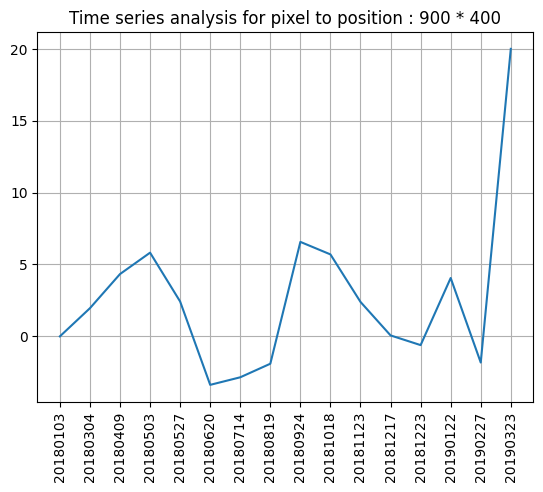

In [10]:
import matplotlib.pyplot as plt

# ترسیم نمودار
plt.plot(unique_list, coefficients)
plt.grid(True)
plt.title('Time series analysis for pixel to position : ' + str(x_pos) + ' * ' + str(y_pos))
# کج کردن لیبل‌های محور x
plt.xticks(rotation=90)
# نمایش نمودار
plt.show()
